Lea Tian

Github Username：leatian7

USC ID：2871623428

# 2. Time Series Classification Part 2: Binary and Multiclass Classification

In [19]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [180]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import  RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc,precision_recall_curve,average_precision_score
from sklearn.naive_bayes import GaussianNB


In [2]:
data_paths = ["../data/AReM/bending1/","../data/AReM/bending2/","../data/AReM/cycling/",
              "../data/AReM/lying/","../data/AReM/sitting/", "../data/AReM/standing/", "../data/AReM/walking/"]
#get  train data
bending_data = []
other_data = []
data = []

for dpath in data_paths:
    for file in os.listdir(dpath):
        df = pd.read_csv(dpath+file, skiprows=4, index_col=0)
        if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
        if df.isna().sum().sum()!=0: #show if there is NaN
            print(dpath+file)
            print(df.isna().sum())
            dfvalues = []
            for v in df.index.values:
                dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
            dfvalues = np.asarray(dfvalues)
            dfvalues = dfvalues.astype(float)
            df = pd.DataFrame(dfvalues,columns=df.columns)
            print(df.shape)
        data.append(df)
                    
        if dpath in ["../data/AReM/bending1/","../data/AReM/bending2/"]:
            if file in ["dataset1.csv","dataset2.csv","dataset6.csv"]:
                bending_data.append(df)
        else:
            if file in ["dataset1.csv","dataset2.csv","dataset6.csv"]:
                other_data.append(df)
                    
print(len(data))

../data/AReM/bending2/dataset4.csv
avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
dtype: int64
(480, 6)
../data/AReM/sitting/dataset8.csv (479, 6)
88


## (a) Binary Classification Using Logistic Regression
**i.**

In [113]:
# compute the first quartile
def quantile1(x):
    return x.quantile(q=0.25)

In [18]:
bending = []
for bdata in bending_data:
    temp_data = bdata.agg(["min","median",quantile1]).values.T
    for ls in temp_data:
        bending.append(ls)

other = []
for odata in other_data:
    temp_data = odata.agg(["min","median",quantile1]).values.T
    for ls in temp_data:
        other.append(ls)

In [30]:
bending = np.array(bending)
other = np.array(other)

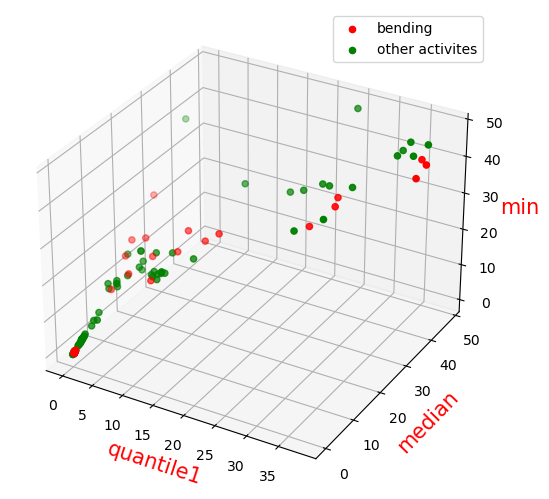

In [31]:
# bending features' scatter plots
x1 = bending[:,0]
y1 = bending[:,1]
z1 = bending[:,2]

# other features' scatter plots
x2 = other[:,0]
y2 = other[:,1]
z2 = other[:,2]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='bending')
ax.scatter(x2, y2, z2, c='g', label='other activites')

# draw legend
ax.legend(loc='best')
 
ax.set_zlabel('min', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('median', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('quantile1', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

**ii.**

In [49]:
bending2 = []
for bdata in bending_data:
    temp_data_up = bdata[:len(bdata)//2]
    temp_data_low = bdata[len(bdata)//2:]
    temp_data_up = temp_data_up.agg(["min","median",quantile1]).values.T
    temp_data_low = temp_data_low.agg(["min","median",quantile1]).values.T
    for ls in temp_data_up:
        bending2.append(ls)
    for ls in temp_data_low:
        bending2.append(ls)
        
other2 = []
for odata in other_data:
    temp_data_up = odata[:len(odata)//2]
    temp_data_low = odata[len(odata)//2:]
    temp_data_up = temp_data_up.agg(["min","median",quantile1]).values.T
    temp_data_low = temp_data_low.agg(["min","median",quantile1]).values.T
    for ls in temp_data_up:
        other2.append(ls)
    for ls in temp_data_low:
        other2.append(ls) 

In [50]:
bending2 = np.array(bending2)
other2 = np.array(other2)

[43.5     0.     15.1875  0.47   21.75    0.43   42.5     0.43   12.
  0.     22.5     0.43   40.31    0.     15.9375  0.     33.      0.
 39.      0.     17.75    0.43   31.31    0.     42.      0.     19.75
  0.     33.      0.     42.      0.     18.1875  0.43   30.      0.
 30.      0.     13.5     0.     10.      0.47   27.      0.     12.75
  0.4225  8.33    0.71   22.25    0.     17.25    0.     25.75    0.
 23.5     0.     18.75    0.3225 19.4575  0.47   28.25    0.     18.
  0.     16.75    0.47   23.5     0.     19.      0.43   12.33    0.5   ]


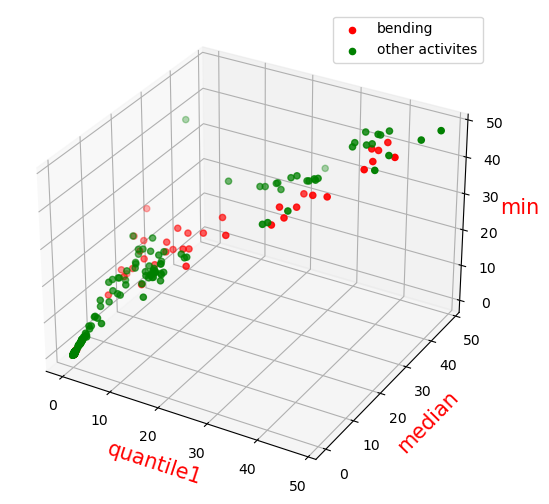

In [52]:
# bending features' scatter plots
x1 = bending2[:,0]
y1 = bending2[:,1]
z1 = bending2[:,2]
print(z1)
# other features' scatter plots
x2 = other2[:,0]
y2 = other2[:,1]
z2 = other2[:,2]

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='bending')
ax.scatter(x2, y2, z2, c='g', label='other activites')

# draw legend
ax.legend(loc='best')
 
ax.set_zlabel('min', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('median', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('quantile1', fontdict={'size': 15, 'color': 'red'})
 
plt.show()

If we split the time series into two parts, we get a larger sample size. And it can better reflect the space where the bending action is concentrated.

**iii.**

In [67]:
len(other_data)

15

In [82]:
L = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
scores = []
l_p = []
models = []
for l in L:
    bending_num = len(bending_data[0]) 
    every_epoch_num = bending_num // l
    bending_dataset = []
    for i,bending in enumerate(bending_data):
        bls = []
        for index in range(l):
            if index < l-1:
                bending_temp = bending[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                bending_temp = bending[every_epoch_num * index:]
            bls.append(bending_temp.agg(["min", "median", quantile1]).values.T.flatten())
        bending_dataset.append(np.array(bls).ravel())
    other_dataset = []
    for i,other in enumerate(other_data):
        ols = []
        for index in range(l):
            if index < l-1:
                other_temp = other[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                other_temp = other[every_epoch_num * index:]
            ols.append(other_temp.agg(["min", "median", quantile1]).values.T.flatten())
        other_dataset.append(np.array(ols).ravel())
    X = np.array(bending_dataset+other_dataset)
    Y = [1 for _ in range(len(bending_data))]+ [0 for _ in range(len(other_data))]
    y = np.array(Y)
    # Cross Validation Setup: 5-Fold CV
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    for p in range(1,X.shape[1]+1):
        rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=p)
        rfe.fit_transform(X, y)
        feature_list_index_Logistic = rfe.get_support(indices=True).tolist()
        X_train = X[:,feature_list_index_Logistic]
        model = LogisticRegression(max_iter=50000)
        score = cross_val_score(model,X_train,y,cv = kf, scoring='accuracy')
        scores.append(score)
        l_p.append([l,p])
        models.append(model)
                

In [97]:
# Get the index of the optimal score
index = np.argmax(np.array(scores).mean(axis=1),axis=0)
# get the optimal l and p combination
best_l,best_p = l_p[index][0],l_p[index][1]

Explain what the right way and the wrong way are to perform cross-validation in this problem.

In [121]:

def get_train_data(best_l,best_p):
    bending_num = len(bending_data[0]) 
    every_epoch_num = bending_num // best_l
    bending_dataset = []
    for i,bending in enumerate(bending_data):
        bls = []
        for index in range(best_l):
            if index < best_l-1:
                bending_temp = bending[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                bending_temp = bending[every_epoch_num * index:]
    #         print(bending_temp.agg(["min", "median"])
            bls.append(bending_temp.agg(["min", "median", quantile1]).values.T.flatten())
        bending_dataset.append(np.array(bls).ravel())
    other_dataset = []
    for i,other in enumerate(other_data):
        ols = []
        for index in range(best_l):
            if index < best_l-1:
                other_temp = other[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                other_temp = other[every_epoch_num * index:]
            ols.append(other_temp.agg(["min", "median", quantile1]).values.T.flatten())
        other_dataset.append(np.array(ols).ravel())
    X = np.array(bending_dataset+other_dataset)
    Y = [1 for _ in range(len(bending_data))]+ [0 for _ in range(len(other_data))]
    y = np.array(Y)
    rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=best_p)
    rfe.fit_transform(X, y)
    feature_list_index_Logistic = rfe.get_support(indices=True).tolist()
    X_train = X[:,feature_list_index_Logistic]
    
    return X_train,y
    
    

In [122]:
X_train,y = get_train_data(best_l,best_p)
model = LogisticRegression(max_iter=50000)
model.fit(X_train,y)

LogisticRegression(max_iter=50000)

Due to the small number of samples in this problem, all positive and negative samples need to be shuffled sufficiently.

**iv.**

In [126]:
# confusion matrix
def confusion_matrix_show(y,y_predict):
    Confusion_matrix=confusion_matrix(y,y_predict) 
    plt.matshow(Confusion_matrix)
    plt.title("confusion_matrix")
    plt.colorbar()
    plt.ylabel("True")
    plt.xlabel("Predict")

In [128]:
# show ROC and AUC

def plot_ROC(model,x_test,y_test):
    y_pro=model.predict_proba(x_test)
    false_positive_rate,recall,thresholds=roc_curve(y_test,y_pro[:,1])
    roc_auc=auc(false_positive_rate,recall)
    ax3=plt.subplot(223)
    ax3.set_title("Receiver Operating Characteristic",verticalalignment='center')
    plt.plot(false_positive_rate,recall,'b',label='AUC=%0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('false_positive_rate')


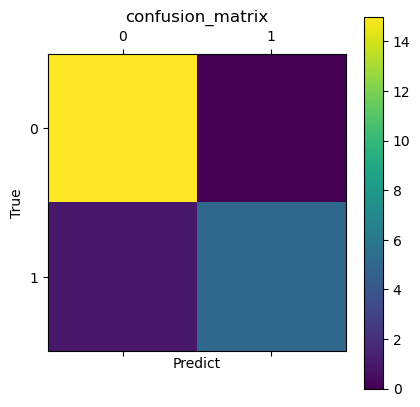

In [127]:


y_pred = model.predict(X_train)
confusion_matrix_show(y,y_pred)
plt.show()

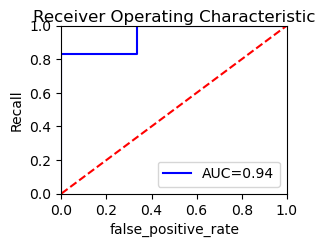

In [129]:
plot_ROC(model,X_train,y)
plt.show()

In [145]:
# best_p == 1.  ==> if x = [0], \beta_0 = model.predict(x)  and if x=[1], \beta_1 = model.predict(x) - \beta_0
x = [0]
x = np.array(x).reshape((1,1))
beta0 = model.predict(x)
x = [1]
x= np.array(x).reshape((1,1))
print(model.predict(np.array([40]).reshape((1,1))))
beta1 = model.predict(x) - beta0
print('beta_0:',beta0,'beta_1:',beta1)

[1]
beta_0: [0] beta_1: [0]


**v.**

In [133]:
#get  test data
bending_test_data = []
other_test_data = []


for dpath in data_paths:
    for file in os.listdir(dpath):
        df = pd.read_csv(dpath+file, skiprows=4, index_col=0)
        if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
        if df.isna().sum().sum()!=0: #show if there is NaN
            print(dpath+file)
            print(df.isna().sum())
            dfvalues = []
            for v in df.index.values:
                dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
            dfvalues = np.asarray(dfvalues)
            dfvalues = dfvalues.astype(float)
            df = pd.DataFrame(dfvalues,columns=df.columns)
            print(df.shape)      
        if dpath in ["../data/AReM/bending1/","../data/AReM/bending2/"]:
            if file in ["dataset3.csv","dataset4.csv","dataset5.csv"]:
                bending_test_data.append(df)
        else:
            if file in ["dataset3.csv","dataset4.csv","dataset5.csv"]:
                other_test_data.append(df)

../data/AReM/bending2/dataset4.csv
avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
dtype: int64
(480, 6)
../data/AReM/sitting/dataset8.csv (479, 6)


In [134]:

def get_test_data(best_l,best_p):
    bending_num = len(bending_test_data[0]) 
    every_epoch_num = bending_num // best_l
    bending_dataset = []
    for i,bending in enumerate(bending_test_data):
        bls = []
        for index in range(best_l):
            if index < best_l-1:
                bending_temp = bending[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                bending_temp = bending[every_epoch_num * index:]
            bls.append(bending_temp.agg(["min", "median", quantile1]).values.T.flatten())
        bending_dataset.append(np.array(bls).ravel())
    other_dataset = []
    for i,other in enumerate(other_test_data):
        ols = []
        for index in range(best_l):
            if index < best_l-1:
                other_temp = other[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                other_temp = other[every_epoch_num * index:]
            ols.append(other_temp.agg(["min", "median", quantile1]).values.T.flatten())
        other_dataset.append(np.array(ols).ravel())
    X = np.array(bending_dataset+other_dataset)
    Y = [1 for _ in range(len(bending_data))]+ [0 for _ in range(len(other_data))]
    y = np.array(Y)
    rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=best_p)
    rfe.fit_transform(X, y)
    feature_list_index_Logistic = rfe.get_support(indices=True).tolist()
    X_test = X[:,feature_list_index_Logistic]
    
    return X_test,y

In [135]:
X_test,y_test = get_test_data(best_l,best_p)
score1 = model.score(X_test,y_test)
score2 = scores[index].mean(axis=0)
print('accuracy on the test set:',score1,'cross-validation accuracy:',score2)

accuracy on the test set: 0.8571428571428571 cross-validation accuracy: 0.82


**vi.**

Yes

**vii.**

Yes, the number of samples for the other actions is much larger than the number of samples for the bending action

## (b) Binary Classification Using L1-penalized logistic regression

**i.**

In [147]:
scores2 = []
for l in L:
    bending_num = len(bending_data[0]) 
    every_epoch_num = bending_num // l
    bending_dataset = []
    for i,bending in enumerate(bending_data):
        bls = []
        for index in range(l):
            if index < l-1:
                bending_temp = bending[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                bending_temp = bending[every_epoch_num * index:]
            bls.append(bending_temp.agg(["min", "median", quantile1]).values.T.flatten())
        bending_dataset.append(np.array(bls).ravel())
    other_dataset = []
    for i,other in enumerate(other_data):
        ols = []
        for index in range(l):
            if index < l-1:
                other_temp = other[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                other_temp = other[every_epoch_num * index:]
            ols.append(other_temp.agg(["min", "median", quantile1]).values.T.flatten())
        other_dataset.append(np.array(ols).ravel())
    X = np.array(bending_dataset+other_dataset)
    Y = [1 for _ in range(len(bending_data))]+ [0 for _ in range(len(other_data))]
    y = np.array(Y)
    # Cross Validation Setup: 5-Fold CV
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    X_train = X[:,feature_list_index_Logistic]
    model = LogisticRegression(max_iter=50000,penalty='l1',solver = 'liblinear')
    score = cross_val_score(model,X_train,y,cv = kf, scoring='accuracy')
    scores2.append(score)

In [149]:
index2 = np.argmax(np.array(scores2).mean(axis=1),axis=0)
score_p = np.array(scores).mean(axis=1)[index]
score_l1 = np.array(scores2).mean(axis=1)[index2]
print('score_p:',score_p,'score_l1:',score_l1)

score_p: 0.86 score_l1: 0.9099999999999999


**ii.**

Using L1-penalized logistic regression is better, and it also is easier one because of its l is 4.

## (c) Multi-class Classification (The Realistic Case)

In [166]:
# index2 = 3
bestl = L[index2]
data_paths = ["../data/AReM/bending1/","../data/AReM/bending2/","../data/AReM/cycling/",
              "../data/AReM/lying/","../data/AReM/sitting/", "../data/AReM/standing/", "../data/AReM/walking/"]
#get test data, train data
test_data = []
test_label = []
train_data = []
train_label = []
data = []

for dpath in ["../data/AReM/bending1/","../data/AReM/bending2/"]:
    for file in os.listdir(dpath):
        df = pd.read_csv(dpath+file, skiprows=4, index_col=0)
        if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
        if df.isna().sum().sum()!=0: #show if there is NaN
            print(dpath+file)
            print(df.isna().sum())
            dfvalues = []
            for v in df.index.values:
                dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
            dfvalues = np.asarray(dfvalues)
            dfvalues = dfvalues.astype(float)
            df = pd.DataFrame(dfvalues,columns=df.columns)
            print(df.shape)
            
        if file in ["dataset1.csv","dataset2.csv"]:
            test_data.append(df)
            test_label.append(0)
        else:
            train_data.append(df)
            train_label.append(0)
for file in os.listdir("../data/AReM/cycling/"):
    df = pd.read_csv("../data/AReM/cycling/"+file, skiprows=4, index_col=0)
    if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
    if df.isna().sum().sum()!=0: #show if there is NaN
        print(dpath+file)
        print(df.isna().sum())
        dfvalues = []
        for v in df.index.values:
            dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
        dfvalues = np.asarray(dfvalues)
        dfvalues = dfvalues.astype(float)
        df = pd.DataFrame(dfvalues,columns=df.columns)
        print(df.shape)
    if file in ["dataset1.csv","dataset2.csv","dataset3.csv"]:
        test_data.append(df)
        test_label.append(1)
    else:
        train_data.append(df)
        train_label.append(1)
        
for file in os.listdir("../data/AReM/lying/"):
    df = pd.read_csv("../data/AReM/lying/"+file, skiprows=4, index_col=0)
    if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
    if df.isna().sum().sum()!=0: #show if there is NaN
        print(dpath+file)
        print(df.isna().sum())
        dfvalues = []
        for v in df.index.values:
            dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
        dfvalues = np.asarray(dfvalues)
        dfvalues = dfvalues.astype(float)
        df = pd.DataFrame(dfvalues,columns=df.columns)
        print(df.shape)
    if file in ["dataset1.csv","dataset2.csv","dataset3.csv"]:
        test_data.append(df)
        test_label.append(2)
    else:
        train_data.append(df)
        train_label.append(2)
        
for file in os.listdir("../data/AReM/sitting/"):
    df = pd.read_csv("../data/AReM/sitting/"+file, skiprows=4, index_col=0)
    if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
    if df.isna().sum().sum()!=0: #show if there is NaN
        print(dpath+file)
        print(df.isna().sum())
        dfvalues = []
        for v in df.index.values:
            dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
        dfvalues = np.asarray(dfvalues)
        dfvalues = dfvalues.astype(float)
        df = pd.DataFrame(dfvalues,columns=df.columns)
        print(df.shape)
    if file in ["dataset1.csv","dataset2.csv","dataset3.csv"]:
        test_data.append(df)
        test_label.append(3)
    else:
        train_data.append(df)
        train_label.append(3)
        
for file in os.listdir("../data/AReM/standing/"):
    df = pd.read_csv("../data/AReM/standing/"+file, skiprows=4, index_col=0)
    if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
    if df.isna().sum().sum()!=0: #show if there is NaN
        print(dpath+file)
        print(df.isna().sum())
        dfvalues = []
        for v in df.index.values:
            dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
        dfvalues = np.asarray(dfvalues)
        dfvalues = dfvalues.astype(float)
        df = pd.DataFrame(dfvalues,columns=df.columns)
        print(df.shape)
    if file in ["dataset1.csv","dataset2.csv","dataset3.csv"]:
        test_data.append(df)
        test_label.append(4)
    else:
        train_data.append(df)
        train_label.append(4)
        
for file in os.listdir("../data/AReM/walking/"):
    df = pd.read_csv("../data/AReM/walking/"+file, skiprows=4, index_col=0)
    if df.shape[0]!=480:
            print(dpath+file,df.shape) #there is one group contains only 479 samples
    if df.isna().sum().sum()!=0: #show if there is NaN
        print(dpath+file)
        print(df.isna().sum())
        dfvalues = []
        for v in df.index.values:
            dfvalues.append(v.split()[1:]) #there is NaN because all data are in the index column
        dfvalues = np.asarray(dfvalues)
        dfvalues = dfvalues.astype(float)
        df = pd.DataFrame(dfvalues,columns=df.columns)
        print(df.shape)
    if file in ["dataset1.csv","dataset2.csv","dataset3.csv"]:
        test_data.append(df)
        test_label.append(5)
    else:
        train_data.append(df)
        train_label.append(5)


../data/AReM/bending2/dataset4.csv
avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
dtype: int64
(480, 6)
../data/AReM/bending2/dataset8.csv (479, 6)


In [167]:
def get_dataset(bestl):
    train_num = len(train_data[0]) 
    every_epoch_num = train_num // bestl
    train_dataset = []
    for i,train in enumerate(train_data):
        bls = []
        for index in range(bestl):
            if index < bestl-1:
                train_temp = train[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                train_temp = train[every_epoch_num * index:]
            bls.append(train_temp.agg(["min", "median", quantile1]).values.T.flatten())
        train_dataset.append(np.array(bls).ravel())
    test_dataset = []
    for i,test in enumerate(test_data):
        ols = []
        for index in range(bestl):
            if index < bestl-1:
                test_temp = test[every_epoch_num * index: every_epoch_num * (index + 1)]
            else:
                test_temp = test[every_epoch_num * index:]
            ols.append(test_temp.agg(["min", "median", quantile1]).values.T.flatten())
        test_dataset.append(np.array(ols).ravel())
    X_train = np.array(train_dataset)
    X_test = np.array(test_dataset)
    
    return X_train,X_test

In [177]:
mul_model = LogisticRegression(max_iter=50000,penalty='l1',solver = 'liblinear')

# print(X_train)
mul_model.fit(X_train,np.array(train_label).reshape((-1,1)))
mul_score = mul_model.score(X_test,np.array(test_label).reshape((-1,1)))
test_error = 1-mul_score

/Users/yinxie/opt/anaconda3/envs/DeepLearning/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8947368421052632

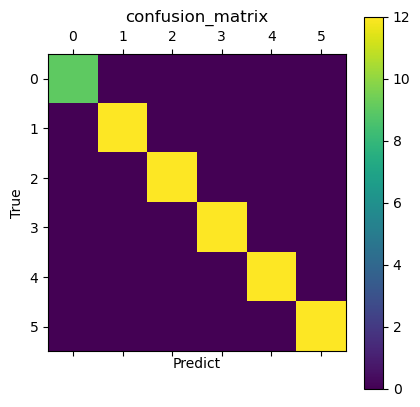

In [178]:
y_pred = mul_model.predict(X_train)
confusion_matrix_show(np.array(train_label).reshape((-1,1)),y_pred)
plt.show()

According to the nature of ROC, we cannot draw the ROC under the multi-classification task.

**ii.**

In [181]:
clf = GaussianNB()
clf.fit(X_train,np.array(train_label).reshape((-1,1)))
bayes_score = clf.score(X_test,np.array(test_label).reshape((-1,1)))
bayes_score

/Users/yinxie/opt/anaconda3/envs/DeepLearning/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9473684210526315

Bayesian classifier gives much better results than logistic regression

**iii.**

From the 2(c)ii, we can see that the Naive Bayes' classifier is bet model for this problem.